# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 5. 5. 2025. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

> ❌ Zkopírovaný kód ze cvičení (především ze cvičení 2) nebude uznán!

> ‼️ Akceptovatelný je úkol pouze v češtině, slovenštině nebo angličtině.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

☝️ Ve svém řešení (kdekoliv) **minimálně jednou vhodně použijte box-plot a parallel sets** (tj. pro kategorické proměnné). Pro jejich konstrukci můžete využít různé vizualizační balíčky.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...) s ohledem na typy grafů, které se chystáte použít.
  
K předzpracování se lze vracet i v průběhu notebooku.
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

---
## Importing neccessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🐾 Načtení dat

In [46]:
import pandas as pd

intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")
locations = pd.read_csv("locations.csv")


## Analyza intakes

In [47]:
display(intakes.shape)
display(intakes.info())
display(intakes.describe(include='all'))
display(intakes.nunique())
display(intakes.head())

(173812, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173812 entries, 0 to 173811
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         173812 non-null  object
 1   Name              123821 non-null  object
 2   DateTime          173812 non-null  object
 3   MonthYear         173812 non-null  object
 4   Found Location    173812 non-null  object
 5   Intake Type       173812 non-null  object
 6   Intake Condition  173812 non-null  object
 7   Animal Type       173812 non-null  object
 8   Sex upon Intake   173811 non-null  object
 9   Age upon Intake   173812 non-null  object
 10  Breed             173812 non-null  object
 11  Color             173812 non-null  object
dtypes: object(12)
memory usage: 15.9+ MB


None

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,173812,123821,173812,173812,173812,173812,173812,173812,173811,173812,173812,173812
unique,156287,29774,119722,140,70183,6,20,5,5,55,3006,661
top,A721033,Luna,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,761,64,2189,31541,119160,147141,94608,58996,28294,33665,17976


Animal ID           156287
Name                 29774
DateTime            119722
MonthYear              140
Found Location       70183
Intake Type              6
Intake Condition        20
Animal Type              5
Sex upon Intake          5
Age upon Intake         55
Breed                 3006
Color                  661
dtype: int64

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A521520,Nina,10/01/2013 07:51:00 AM,October 2013,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan
1,A664235,NaN,10/01/2013 08:33:00 AM,October 2013,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
2,A664236,NaN,10/01/2013 08:33:00 AM,October 2013,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
3,A664237,NaN,10/01/2013 08:33:00 AM,October 2013,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
4,A664233,Stevie,10/01/2013 08:53:00 AM,October 2013,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White


Name obsahuje hodne prazdných udaju

Intake Type, Animal Type, Intake Condition, Sex upon Intake podle kardinality vypadaji, že jsou kategoricke

Tak to upravime

In [48]:
# Zmena chybejicich hodnot na NaN

intakes.replace(["", " ", "Unknown", "unknown", "None", "none"], np.nan, inplace=True)

# Převod na kategoricke

cat_cols = ['Animal Type', 'Sex upon Intake', 'Intake Type', 'Intake Condition']
for col in cat_cols:
    intakes[col] = intakes[col].astype('category')


Kontrola

In [49]:
#Ted to je v poradku

intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173812 entries, 0 to 173811
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         173812 non-null  object  
 1   Name              123724 non-null  object  
 2   DateTime          173812 non-null  object  
 3   MonthYear         173812 non-null  object  
 4   Found Location    173812 non-null  object  
 5   Intake Type       173812 non-null  category
 6   Intake Condition  173764 non-null  category
 7   Animal Type       173812 non-null  category
 8   Sex upon Intake   160270 non-null  category
 9   Age upon Intake   173812 non-null  object  
 10  Breed             173803 non-null  object  
 11  Color             173812 non-null  object  
dtypes: category(4), object(8)
memory usage: 11.3+ MB


In [50]:
# Prevod Age upon Intake na dny

import re

def age_to_days(age):
    if pd.isna(age):            
        return np.nan
    s = str(age).strip().lower()
    if not s:
        return np.nan

    parts = re.findall(r'(\d+)\s*(year|years|month|months|week|weeks|day|days)', s)

    if not parts:
        return np.nan

    total_days = 0
    for num, unit in parts:
        num = int(num)
        if 'year' in unit:
            total_days += num * 365
        elif 'month' in unit:
            total_days += num * 30
        elif 'week' in unit:
            total_days += num * 7
        elif 'day' in unit:
            total_days += num

    return total_days

intakes['age_upon_intake_days'] = intakes['Age upon Intake'].apply(age_to_days)


In [51]:
# Prevod DateTime na datetime type

intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], errors='coerce', infer_datetime_format=True)

/tmp/ipykernel_39131/207500894.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], errors='coerce', infer_datetime_format=True)


Kontrola

In [52]:
# Sedi to

intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173812 entries, 0 to 173811
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Animal ID             173812 non-null  object        
 1   Name                  123724 non-null  object        
 2   DateTime              173812 non-null  datetime64[ns]
 3   MonthYear             173812 non-null  object        
 4   Found Location        173812 non-null  object        
 5   Intake Type           173812 non-null  category      
 6   Intake Condition      173764 non-null  category      
 7   Animal Type           173812 non-null  category      
 8   Sex upon Intake       160270 non-null  category      
 9   Age upon Intake       173812 non-null  object        
 10  Breed                 173803 non-null  object        
 11  Color                 173812 non-null  object        
 12  age_upon_intake_days  173812 non-null  int64         
dtyp

---
## 📤 Analýza datasetu outcomes

Dataset **outcomes** obsahuje informace o zvířatech, která **opustila útulek** (adopce, převod do jiného útulku, vrácení majiteli, atd.). Oproti datasetu intakes obsahuje jiné specifické sloupce:

**Specifické sloupce v outcomes:**
* 🔑 `Date of Birth` - datum narození zvířete
* 📤 `Outcome Type` - typ odchodu (Adoption, Transfer, Return to Owner, ...)
* 📝 `Outcome Subtype` - podtyp odchodu (detaily)
* 👤 `Sex upon Outcome` - pohlaví při odchodu (může se lišit od příjmu - kastrace/sterilizace)
* 📅 `Age upon Outcome` - věk při odchodu

Pojďme se nejprve podívat na strukturu dat.

In [53]:
display(outcomes.shape)
display(outcomes.info())
display(outcomes.describe(include='all'))
display(outcomes.nunique())
display(outcomes.head())

(173775, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173775 entries, 0 to 173774
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         173775 non-null  object
 1   Date of Birth     173775 non-null  object
 2   Name              123991 non-null  object
 3   DateTime          173775 non-null  object
 4   MonthYear         173775 non-null  object
 5   Outcome Type      173729 non-null  object
 6   Outcome Subtype   79660 non-null   object
 7   Animal Type       173775 non-null  object
 8   Sex upon Outcome  173774 non-null  object
 9   Age upon Outcome  173766 non-null  object
 10  Breed             173775 non-null  object
 11  Color             173775 non-null  object
dtypes: object(12)
memory usage: 15.9+ MB


None

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,173775,173775,123991,173775,173775,173729,79660,173775,173774,173766,173775,173775
unique,156237,8692,29756,146382,140,11,26,5,5,55,3010,663
top,A721033,2016-05-01,Luna,2016-04-18T00:00:00-05:00,06-2019,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,121,760,39,2244,84598,40410,94505,60933,28782,34039,17999


Animal ID           156237
Date of Birth         8692
Name                 29756
DateTime            146382
MonthYear              140
Outcome Type            11
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        55
Breed                 3010
Color                  663
dtype: int64

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A668305,2012-12-01,NaN,2013-12-02T00:00:00-05:00,12-2013,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Brown/Yellow
1,A673335,2012-02-22,NaN,2014-02-22T00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon,Black/Gray
2,A675999,2013-04-03,NaN,2014-04-07T00:00:00-05:00,04-2014,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Green
3,A679066,2014-04-16,NaN,2014-05-16T00:00:00-05:00,05-2014,NaN,NaN,Other,Unknown,4 weeks,Rabbit Sh,Brown
4,A680855,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


### 🔍 Zjištění z datasetu outcomes

Ze základního přehledu můžeme pozorovat:
* Dataset obsahuje **173,776 záznamů** (o 36 méně než intakes)
* Celkem **13 sloupců** (o 1 více než intakes - přidán `Date of Birth`)
* Většina sloupců je typu `object` - budeme muset konvertovat
* Sloupce `Name`, `Outcome Subtype` a `Date of Birth` obsahují chybějící hodnoty
* `Outcome Type` má pravděpodobně kategorie: Adoption, Transfer, Return to Owner, Euthanasia, ...
* `Animal Type`, `Sex upon Outcome`, `Outcome Type`, `Outcome Subtype` vypadají jako kategorické proměnné

## 🧹 Ošetření chybějících hodnot v outcomes

Podobně jako u intakes, i zde mohou být chybějící hodnoty reprezentovány různými způsoby:
* prázdné řetězce `""`
* hodnota `"Unknown"`
* hodnota `"None"`
* mezery

Převedeme všechny tyto varianty na `NaN`.

In [54]:
# Nahrazení různých reprezentací chybějících hodnot na NaN
outcomes.replace(["", " ", "Unknown", "unknown", "None", "none"], np.nan, inplace=True)

## ✅ Kontrola změn po ošetření chybějících hodnot

In [55]:
# Zobrazení počtu chybějících hodnot po konverzi
display(outcomes.head())
display(outcomes.isna().sum().sort_values(ascending=False))

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A668305,2012-12-01,NaN,2013-12-02T00:00:00-05:00,12-2013,Transfer,Partner,Other,NaN,1 year,Turtle Mix,Brown/Yellow
1,A673335,2012-02-22,NaN,2014-02-22T00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,NaN,2 years,Raccoon,Black/Gray
2,A675999,2013-04-03,NaN,2014-04-07T00:00:00-05:00,04-2014,Transfer,Partner,Other,NaN,1 year,Turtle Mix,Green
3,A679066,2014-04-16,NaN,2014-05-16T00:00:00-05:00,05-2014,NaN,NaN,Other,NaN,4 weeks,Rabbit Sh,Brown
4,A680855,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,NaN,2 weeks,Duck,Yellow/Black


Outcome Subtype     94115
Name                49880
Sex upon Outcome    13506
Outcome Type           46
Age upon Outcome        9
Breed                   9
Animal ID               0
Date of Birth           0
DateTime                0
MonthYear               0
Animal Type             0
Color                   0
dtype: int64

### 📊 Pozorování

Sloupce s nejvíce chybějícími hodnotami:
* `Name` - mnoho zvířat nemá jméno (zejména toulaví)
* `Outcome Subtype` - ne všechny typy odchodu mají podtyp
* `Date of Birth` - některá data narození nejsou známa
* `Sex upon Outcome` - některá pohlaví nejsou určena

## 🔠 Konverze kategorických proměnných

Pro efektivnější práci s pamětí a lepší analýzu převedeme kategorické sloupce na datový typ `category`:

* `Animal Type` - typ zvířete (Dog, Cat, Bird, Other, Livestock)
* `Sex upon Outcome` - pohlaví při odchodu
* `Outcome Type` - typ odchodu z útulku
* `Outcome Subtype` - podtyp odchodu

In [56]:
# Konverze kategorických sloupců na typ category
cat_cols_outcomes = ['Animal Type', 'Sex upon Outcome', 'Outcome Type', 'Outcome Subtype']
for col in cat_cols_outcomes:
    outcomes[col] = outcomes[col].astype('category')

# Kontrola změn
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173775 entries, 0 to 173774
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         173775 non-null  object  
 1   Date of Birth     173775 non-null  object  
 2   Name              123895 non-null  object  
 3   DateTime          173775 non-null  object  
 4   MonthYear         173775 non-null  object  
 5   Outcome Type      173729 non-null  category
 6   Outcome Subtype   79660 non-null   category
 7   Animal Type       173775 non-null  category
 8   Sex upon Outcome  160269 non-null  category
 9   Age upon Outcome  173766 non-null  object  
 10  Breed             173766 non-null  object  
 11  Color             173775 non-null  object  
dtypes: category(4), object(8)
memory usage: 11.3+ MB


## 🔢 Převod věku na číselnou hodnotu

Sloupec `Age upon Outcome` obsahuje věk v textové podobě (např. "2 years", "3 months", "1 week"). Pro analýzu potřebujeme číselnou hodnotu ve dnech.

Použijeme stejnou funkci `age_to_days()`, kterou jsme vytvořili pro intakes dataset.

In [57]:
# Použití stejné funkce pro konverzi věku na dny
outcomes['age_upon_outcome_days'] = outcomes['Age upon Outcome'].apply(age_to_days)

# Kontrola výsledku
display(outcomes[['Age upon Outcome', 'age_upon_outcome_days']].head(10))
display(outcomes['age_upon_outcome_days'].describe())

,Age upon Outcome,age_upon_outcome_days
0,1 year,365.0
1,2 years,730.0
2,1 year,365.0
3,4 weeks,28.0
4,2 weeks,14.0
5,2 weeks,14.0
6,2 weeks,14.0
7,2 weeks,14.0
8,2 weeks,14.0
9,2 weeks,14.0


count    173766.000000
mean        723.301210
std        1021.682936
min           0.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: age_upon_outcome_days, dtype: float64

## 📅 Konverze DateTime na typ datetime64

Sloupec `DateTime` obsahuje časové razítko ve formátu textu. Převedeme ho na typ `datetime64[ns]` pro lepší práci s časovými daty.

In [58]:
# Konverze DateTime na datetime64
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], errors='coerce')

Markdown Cell 9:
## 🎂 Konverze Date of Birth na typ datetime64

Sloupec `Date of Birth` také převedeme na typ `datetime64[ns]`.

In [59]:
# Konverze Date of Birth na datetime64
outcomes['Date of Birth'] = pd.to_datetime(outcomes['Date of Birth'], errors='coerce')

## 📋 Finální přehled datasetu outcomes po předzpracování

In [60]:
# Zobrazení finálního stavu datasetu
display(outcomes.info())
display(outcomes.head())

# Statistiky numerického sloupce
display(outcomes['age_upon_outcome_days'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173775 entries, 0 to 173774
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype                    
---  ------                 --------------   -----                    
 0   Animal ID              173775 non-null  object                   
 1   Date of Birth          173775 non-null  datetime64[ns]           
 2   Name                   123895 non-null  object                   
 3   DateTime               3584 non-null    datetime64[ns, UTC-05:00]
 4   MonthYear              173775 non-null  object                   
 5   Outcome Type           173729 non-null  category                 
 6   Outcome Subtype        79660 non-null   category                 
 7   Animal Type            173775 non-null  category                 
 8   Sex upon Outcome       160269 non-null  category                 
 9   Age upon Outcome       173766 non-null  object                   
 10  Breed                  173766 no

None

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,age_upon_outcome_days
0,A668305,2012-12-01,NaN,2013-12-02 00:00:00-05:00,12-2013,Transfer,Partner,Other,NaN,1 year,Turtle Mix,Brown/Yellow,365.0
1,A673335,2012-02-22,NaN,2014-02-22 00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,NaN,2 years,Raccoon,Black/Gray,730.0
2,A675999,2013-04-03,NaN,2014-04-07 00:00:00-05:00,04-2014,Transfer,Partner,Other,NaN,1 year,Turtle Mix,Green,365.0
3,A679066,2014-04-16,NaN,2014-05-16 00:00:00-05:00,05-2014,NaN,NaN,Other,NaN,4 weeks,Rabbit Sh,Brown,28.0
4,A680855,2014-05-25,NaN,2014-06-10 00:00:00-05:00,06-2014,Transfer,Partner,Bird,NaN,2 weeks,Duck,Yellow/Black,14.0


count    173766.000000
mean        723.301210
std        1021.682936
min           0.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: age_upon_outcome_days, dtype: float64

---
## 🖊️ Deskriptivní statistiky

### Univariační analýza 

#### Age upon Intake

Analyzujeme věk zvířat při příjmu do útulku (v dnech).

In [61]:
# Základní statistiky
display(intakes['age_upon_intake_days'].describe())

count    173812.000000
mean        706.644046
std        1017.154479
min           0.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: age_upon_intake_days, dtype: float64

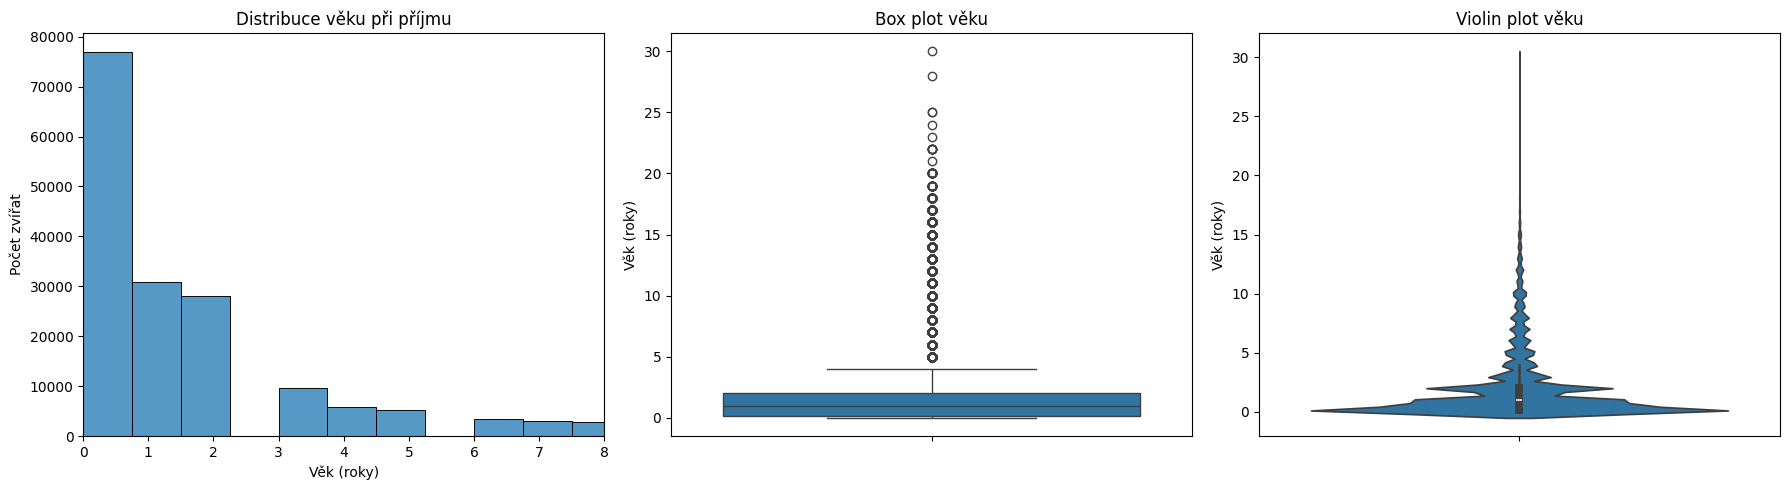

In [62]:
# Vytvoření 3 grafů vedle sebe
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sloupec s lety
intakes['age_upon_intake_years'] = intakes['age_upon_intake_days'] / 365


# Calculate 95th percentile for xlim
percentile_95 = intakes['age_upon_intake_years'].quantile(0.95)

sns.histplot(data=intakes, x = 'age_upon_intake_years', bins=40, ax=axes[0])
axes[0].set_title('Distribuce věku při příjmu')
axes[0].set_xlabel('Věk (roky)')
axes[0].set_ylabel('Počet zvířat')
axes[0].set_xlim(0, percentile_95)

# Graf 2: Box plot
sns.boxplot(data=intakes, y='age_upon_intake_years', ax=axes[1])
axes[1].set_title('Box plot věku')
axes[1].set_ylabel('Věk (roky)')

# Graf 3: Violin plot
sns.violinplot(data=intakes, y='age_upon_intake_years', ax=axes[2])
axes[2].set_title('Violin plot věku')
axes[2].set_ylabel('Věk (roky)')

plt.tight_layout()
plt.show()

**Pozorovani:**
Útulek přijímá převážně mladá zvířata (medián 1.5 roku), což naznačuje, že většina příjmů jsou:
- Mláďata z neplánovaných vrhů
- Mladí toulaví psi/kočky
- Zvířata, která majitelé odevzdali v raném věku

Starší zvířata (>10 let) jsou vzácná, ale jejich přítomnost jako outlierů naznačuje případy opuštěných starých domácích mazlíčků.

Vysoký podíl mláďat může naznačovat nedostatek kastrací v populaci

### Dalsi priznaky

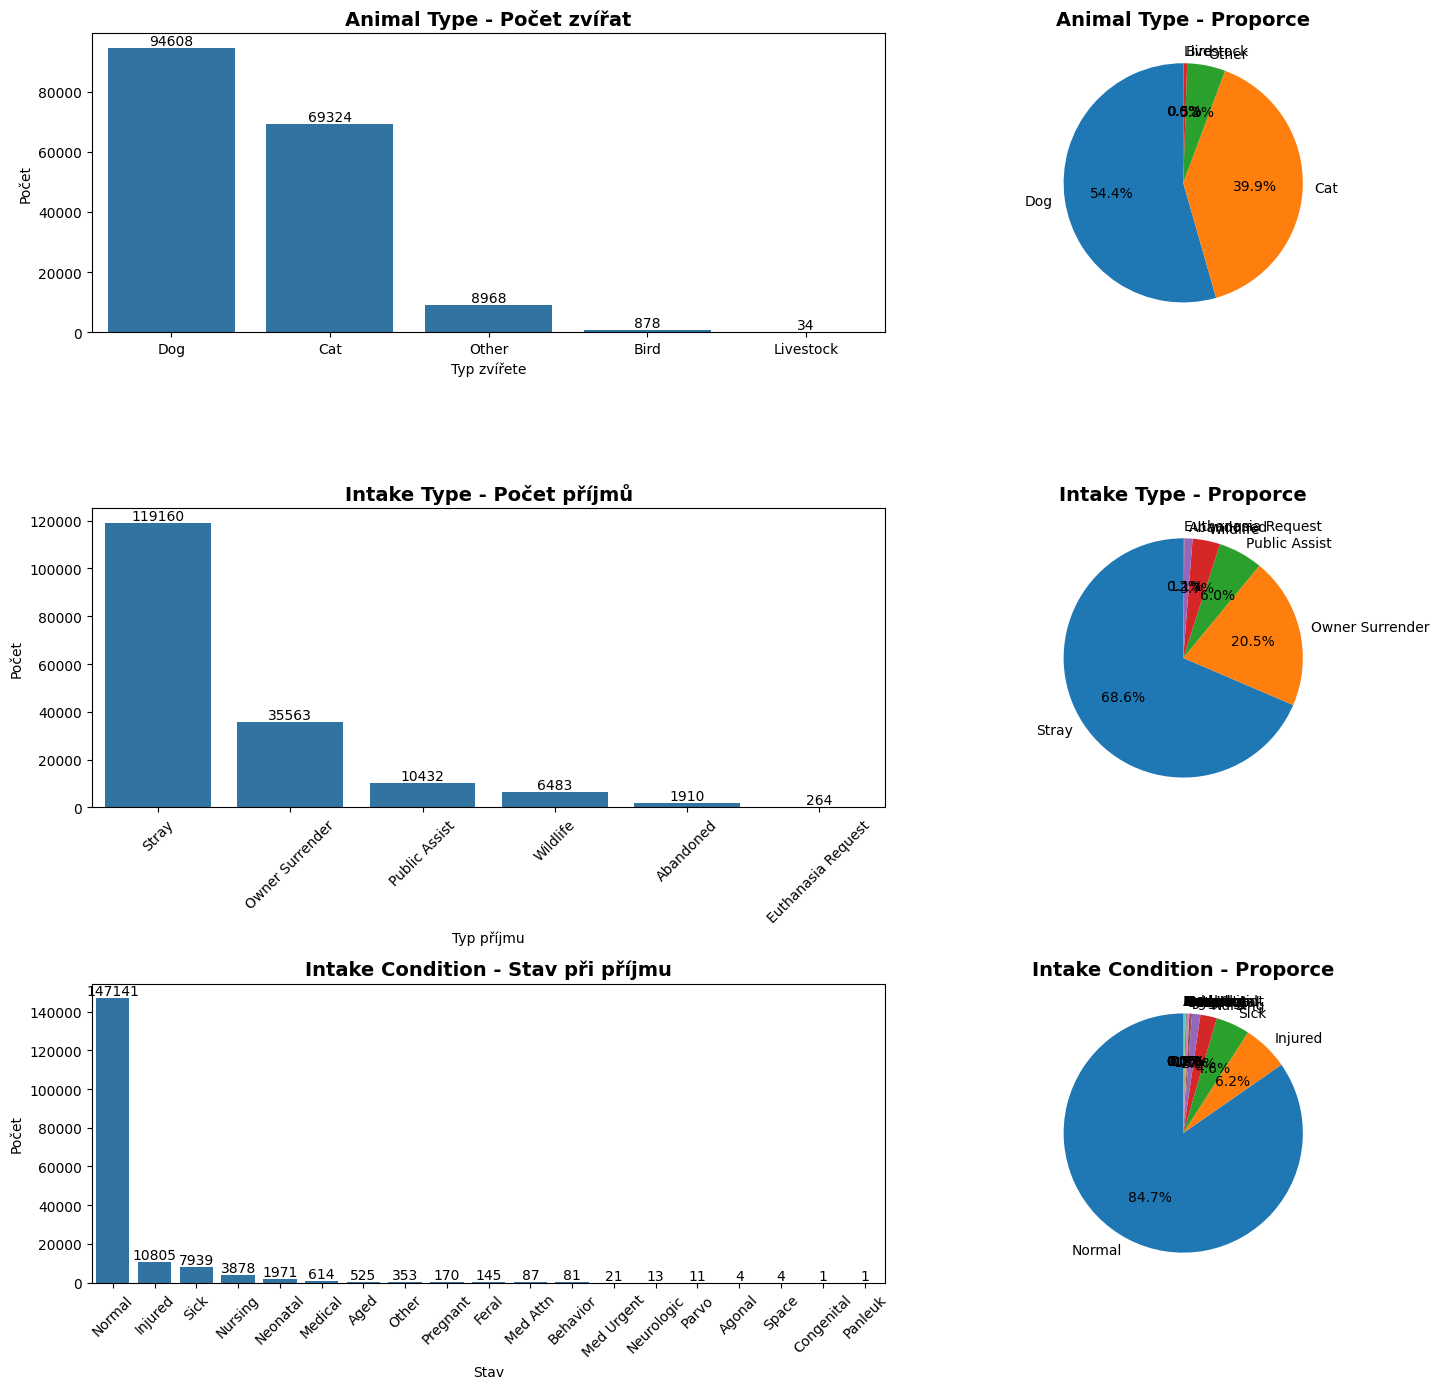

In [67]:
# Vytvoření figury pro 3 příznaky
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# --- Animal Type ---
animal_counts = intakes['Animal Type'].value_counts()

# Count plot
sns.countplot(data=intakes, x='Animal Type', 
              order=animal_counts.index,
              ax=axes[0, 0])
axes[0, 0].set_title('Animal Type - Počet zvířat', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Typ zvířete')
axes[0, 0].set_ylabel('Počet')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# Pie chart
animal_counts.plot.pie(ax=axes[0, 1], 
                       autopct='%1.1f%%',
                       startangle=90)
axes[0, 1].set_title('Animal Type - Proporce', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('')

# --- Intake Type ---
intake_type_counts = intakes['Intake Type'].value_counts()

# Count plot
sns.countplot(data=intakes, x='Intake Type', 
              order=intake_type_counts.index,
              ax=axes[1, 0])
axes[1, 0].set_title('Intake Type - Počet příjmů', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Typ příjmu')
axes[1, 0].set_ylabel('Počet')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].bar_label(axes[1, 0].containers[0])

# Pie chart
intake_type_counts.plot.pie(ax=axes[1, 1], 
                            autopct='%1.1f%%',
                            startangle=90)
axes[1, 1].set_title('Intake Type - Proporce', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('')

# --- Intake Condition ---
condition_counts = intakes['Intake Condition'].value_counts()

# Count plot
sns.countplot(data=intakes, x='Intake Condition', 
              order=condition_counts.index,
              ax=axes[2, 0])
axes[2, 0].set_title('Intake Condition - Stav při příjmu', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Stav')
axes[2, 0].set_ylabel('Počet')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].bar_label(axes[2, 0].containers[0])

# Pie chart
condition_counts.plot.pie(ax=axes[2, 1], 
                         autopct='%1.1f%%',
                         startangle=90)
axes[2, 1].set_title('Intake Condition - Proporce', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('')

plt.tight_layout()
plt.show()